# Leah Prince

## Hospital Patient Experience

HCAHPS is the first national, standardized, publicly-reported survey of patients' perspectives of hospital care. The survey captures the patients' experience of communication with doctors and nurses, responsiveness of hospital staff, communication about medicines, cleanliness and quietness of the hospital, discharge information, transition to post-hospital care and overall rating of the hospital.The survey is administered between 2 and 42 days after discharge to a random sample of patients, by mail, telephone and interactive voice response. The survey is administered in a variety of languages and over 4,000 hospitals participate in the survey, with over 3 million patients completing the survey each year.

### Data Dictionary

[Data Dictionary](https://hcahpsonline.org/globalassets/hcahps/technical-specifications/2019_technical-specifications_xml-file-specifications-v4.2.pdf)

# Objectives
Predict hospital patient experience, using one of the most import features, "Nurses Courtesy and Respect - Q01_1". Nurses are on the front lines of health care. They become experts at establishing relationships with patients. A healthly nurse-patient relationship built on trust and respect goes a long way in improving a patient's overall health. Although, this dataset contains an overall rating of patient experience, the overall rating is calculated based on each individual component, being the questions. It is important to understand the uniqueness of each question and how it contributes to the overall experience. Therefore, "Nurses Courtesy and Respect" will be predicted based on a number of feature variables, such as patient's age and race, as well as the admission source and reason for admission. Other features will be incorporated into the model to determine model performance.

- Build a model that predicts hospital patient experience. 
- The initial model that will be used is Logistic Regression. Depending on the accuracy of the model. Other models may be incorporated, such as Decision Trees and Random Forest.

## Import Libraries and Files

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#logistic regression with sklearn
from sklearn.linear_model import LogisticRegression
#logistic regression with statsmodels is sm.Logit
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, roc_auc_score
from sklearn import metrics

In [2]:
normalized_df = pd.read_csv('Hospital Patient Experience_Cleaned.csv', low_memory=False)
normalized_df.head()

,Unnamed: 0,WES_HOSPID,FINAL_STATE,FINAL_BEDSIZE,FINAL_OWNERSHIP,FINAL_TEACHING,FINAL_REGION,AGE,Q01_06,Q02_06,...,FINAL_MODE_1,SURVLANG_1,SURVLANG_3,FINAL_STATE_Midwest_Region,FINAL_STATE_Northeast_Region,FINAL_STATE_South_Region,Season_Fall,Season_Spring,Season_Summer,Year_2005
0,0,1,South_Region,4,3,3,5,8.0,1,1,...,1,1,0,0,0,1,0,1,0,0
1,1,1,South_Region,4,3,3,5,8.0,0,0,...,1,1,0,0,0,1,0,1,0,0
2,2,1,South_Region,4,3,3,5,7.0,1,1,...,1,1,0,0,0,1,0,1,0,0
3,3,1,South_Region,4,3,3,5,6.0,1,0,...,1,1,0,0,0,1,0,1,0,0
4,4,1,South_Region,4,3,3,5,8.0,0,0,...,1,1,0,0,0,1,0,1,0,0


In [3]:
normalized_df.columns

Index(['Unnamed: 0', 'WES_HOSPID', 'FINAL_STATE', 'FINAL_BEDSIZE',
       'FINAL_OWNERSHIP', 'FINAL_TEACHING', 'FINAL_REGION', 'AGE', 'Q01_06',
       'Q02_06', 'Q03_06', 'Q04_06', 'Q05_06', 'Q06_06', 'Q07_06', 'Q08_06',
       'Q09_06', 'Q10_06', 'Q11_06', 'Q12_06', 'Q13_06', 'Q14_06', 'Q15_06',
       'Q16_06', 'Q17_06', 'Q18_06', 'Q19_06', 'Q20_06', 'Q21_06', 'Q22_06',
       'Q23_06', 'Q24_06', 'Q25_06', 'Q26A_06', 'Q26B_06', 'Q26C_06',
       'Q26D_06', 'Q26E_06', 'Q27_06', 'RECORDID', 'RACE', 'FINAL_MODE', 'SEX',
       'CRITICAL_HOSPITAL', 'ADMISSIONSOURCE', 'PRINCIPALREASONADMISSION',
       'PATIENTDISCHARGEDATE', 'SURVLANG', 'Season', 'Year', 'Q01_1', 'Q02_1',
       'Q03_1', 'Q05_1', 'Q06_1', 'Q07_1', 'Q08_1', 'Q09_1', 'AGE_1.0',
       'AGE_2.0', 'AGE_3.0', 'AGE_4.0', 'AGE_5.0', 'AGE_6.0', 'AGE_7.0',
       'AGE_8.0', 'AGE_9.0', 'AGE_10.0', 'AGE_11.0', 'AGE_12.0', 'AGE_13.0',
       'AGE_14.0', 'RACE_1.0', 'RACE_2.0', 'RACE_3.0', 'RACE_4.0', 'SEX_1.0',
       'CRITICAL_HOSP

## Exploring the Outcome

In [4]:
normalized_df['Q01_1'].value_counts()

1    144869
0     45821
Name: Q01_1, dtype: int64

In [5]:
normalized_df['Q01_1'].value_counts(normalize=True)*100

1    75.970948
0    24.029052
Name: Q01_1, dtype: float64

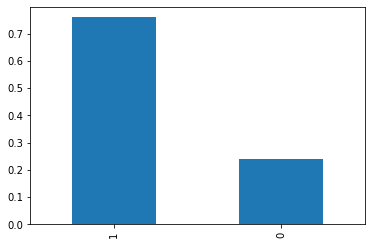

In [6]:
normalized_df['Q01_1'].value_counts(normalize=True).plot(kind='bar');

Due to the 76:24 split, this indicates that the dataset is unbalanced. Logistic regression and decision trees have bias towards classes with a high number of instances and tend to predict the majority class and overfit the model. Therefore, it may be a high probability of misclassification for the minority group. However, I will test this assumption by building a Logistic Regression and Decision Tree model.

## Logistic Regression Model - using Train, Test, Split

In [7]:
X = normalized_df[['Q02_1', 'Q03_1','Season_Spring', 'Season_Summer','SEX_1.0',
       'CRITICAL_HOSPITAL_N','ADMISSIONSOURCE_1']]
y = normalized_df['Q01_1']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 1)

In [9]:
model1 = LogisticRegression()

In [10]:
model1.fit(X_train, y_train)

LogisticRegression()

### Model Predictions

In [11]:
y_pred = model1.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

I'm only seeing predictions of top box ratings.

### Model Evaluation Metrics

#### Accuracy Score

In [12]:
metrics.accuracy_score(y_test, y_pred)*100

84.70991312251998

#### Confusion Matrix

In [13]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [14]:
print("Correctly Identified")
print("true negatives:", tn)
print("true positives", tp)
print("----------------------------")
print("Missclassified")
print("false positives", fp)
print("false negtives", fn)

Correctly Identified
true negatives: 9749
true positives 38711
----------------------------
Missclassified
false positives 4056
false negtives 4691


#### ROC AUC Curve

In [15]:
print(roc_auc_score(y_test, y_pred))

0.7990554156728316


As expected, there is a high number of misclassifications. I will run a new model using KFolds to try to reduce the number of misclassifications and increase the AUC.

## Logistic Regression Model using - KFold Cross Validation
I will use kfolds and cross validation to ensure that every observation from the original dataset has a chance of appearing in the training and testing dataset, to try and create a less bias model.

In [16]:
k = 10
kf = KFold(n_splits = k, random_state = 1, shuffle = True)

In [17]:
auc_values = []

for train_index, test_index in kf.split(X,y):
    model2 = LogisticRegression().fit(X.iloc[train_index], y.iloc[train_index])
    auc_values.append(roc_auc_score(y.iloc[test_index], model2.predict_proba(X.iloc[test_index])[:, 1]))

### Model Evaluation Metrics

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
scores = cross_val_score(model2, X, y, cv=kf, scoring='roc_auc')
print('CV AUC {}, \ nAverage AUC {}'.format(scores, scores.mean()))

CV AUC [0.87385767 0.86942257 0.87552749 0.87423965 0.87416394 0.87471694
 0.86882208 0.87432022 0.87568799 0.87586289], \ nAverage AUC 0.8736621443814789


KFolds increased the model performance from .79 to .87 using the same variables, so this is an improvement. I will see if cross validation will improve the model even more before adjusting the variables.

## Logistic Regression Model  - using Cross Validation
Cross Validation will give the model an opportunity to train on multiple train, test, splits, which will give a better indication of model performance.

In [20]:
normalized_df['intercept'] = 1.0
X = normalized_df[['Q02_1', 'Q03_1','Season_Spring', 'Season_Summer','SEX_1.0',
       'CRITICAL_HOSPITAL_N','ADMISSIONSOURCE_1']]
y = normalized_df['Q01_1']

In [21]:
model3 = LogisticRegression()

In [22]:
model3.fit(X,y)

LogisticRegression()

### Model Evaluation Metrics

In [23]:
scores = cross_val_score(model3, X, y, cv=10, scoring='roc_auc')
print('CV AUC {}, \ nAverage AUC {}'.format(scores, scores.mean()))

CV AUC [0.87414423 0.85742925 0.86934683 0.85474055 0.8856827  0.86967419
 0.87762896 0.87318038 0.87315953 0.86815744], \ nAverage AUC 0.8703144075749014


In [24]:
from sklearn.model_selection import cross_val_predict

In [25]:
y_pred = cross_val_predict(model3, X, y, cv=10)
confusion_matrix(y, y_pred)

array([[ 32411,  13410],
       [ 15254, 129615]], dtype=int64)

Cross Validation slightly reduced the model performance, adding more misclassifications to the model. Due to the assumption of an unbalanced dataset, I will undersample the data to see if this helps the model performance.

## Undersample
This method will be used to randomly remove samples from the majority class to prevent it from dominating the algorithm.

In [26]:
normalized_df['Q01_1'].value_counts()

1    144869
0     45821
Name: Q01_1, dtype: int64

#### Put the lower ratings in a separate dataset

In [27]:
df_class_0 = normalized_df[normalized_df['Q01_1'] == 0]

#### Put the high ratings in a separate dataset

In [28]:
df_class_1 = normalized_df[normalized_df['Q01_1'] == 1]

#### Undersample class 1
Set the number of samples to match the minority class

In [29]:
df_class_1_undersample = df_class_1[df_class_1['Q01_1'] == 1].sample(n=45821, random_state=1, replace=False)

#### Concatenate both of the dataframes

In [30]:
balanced_df = pd.concat([df_class_1_undersample, df_class_0], axis = 0)

#### Check that the data is balanced

In [31]:
balanced_df['Q01_1'].value_counts()

1    45821
0    45821
Name: Q01_1, dtype: int64

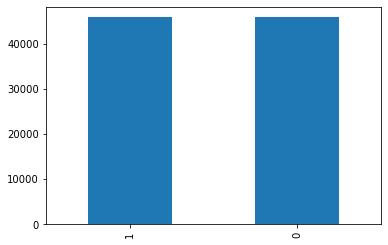

In [32]:
balanced_df['Q01_1'].value_counts().plot(kind='bar');

### Train, Test, Split

In [33]:
balanced_df.columns

Index(['Unnamed: 0', 'WES_HOSPID', 'FINAL_STATE', 'FINAL_BEDSIZE',
       'FINAL_OWNERSHIP', 'FINAL_TEACHING', 'FINAL_REGION', 'AGE', 'Q01_06',
       'Q02_06', 'Q03_06', 'Q04_06', 'Q05_06', 'Q06_06', 'Q07_06', 'Q08_06',
       'Q09_06', 'Q10_06', 'Q11_06', 'Q12_06', 'Q13_06', 'Q14_06', 'Q15_06',
       'Q16_06', 'Q17_06', 'Q18_06', 'Q19_06', 'Q20_06', 'Q21_06', 'Q22_06',
       'Q23_06', 'Q24_06', 'Q25_06', 'Q26A_06', 'Q26B_06', 'Q26C_06',
       'Q26D_06', 'Q26E_06', 'Q27_06', 'RECORDID', 'RACE', 'FINAL_MODE', 'SEX',
       'CRITICAL_HOSPITAL', 'ADMISSIONSOURCE', 'PRINCIPALREASONADMISSION',
       'PATIENTDISCHARGEDATE', 'SURVLANG', 'Season', 'Year', 'Q01_1', 'Q02_1',
       'Q03_1', 'Q05_1', 'Q06_1', 'Q07_1', 'Q08_1', 'Q09_1', 'AGE_1.0',
       'AGE_2.0', 'AGE_3.0', 'AGE_4.0', 'AGE_5.0', 'AGE_6.0', 'AGE_7.0',
       'AGE_8.0', 'AGE_9.0', 'AGE_10.0', 'AGE_11.0', 'AGE_12.0', 'AGE_13.0',
       'AGE_14.0', 'RACE_1.0', 'RACE_2.0', 'RACE_3.0', 'RACE_4.0', 'SEX_1.0',
       'CRITICAL_HOSP

In [34]:
features = ['Q02_1', 'Q03_1','Season_Spring', 'Season_Summer', 'Season_Fall','SEX_1.0',
       'CRITICAL_HOSPITAL_N','ADMISSIONSOURCE_1','ADMISSIONSOURCE_2',
       'ADMISSIONSOURCE_3', 'ADMISSIONSOURCE_4', 'ADMISSIONSOURCE_5',
       'ADMISSIONSOURCE_6', 'ADMISSIONSOURCE_7', 'ADMISSIONSOURCE_8',
       'ADMISSIONSOURCE_9']

X = balanced_df[features]
y = balanced_df['Q01_1']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 1)

## Decision Tree

In [36]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [37]:
treeclf = DecisionTreeClassifier(max_depth = 5, random_state = 1)

In [38]:
treeclf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

[Text(390.6, 498.3, 'Q02_1 <= 0.5\ngini = 0.5\nsamples = 64149\nvalue = [32164, 31985]\nclass = y[0]'),
 Text(195.3, 407.70000000000005, 'Q03_1 <= 0.5\ngini = 0.306\nsamples = 34198\nvalue = [27753, 6445]\nclass = y[0]'),
 Text(97.65, 317.1, 'SEX_1.0 <= 0.5\ngini = 0.222\nsamples = 26102\nvalue = [22789, 3313]\nclass = y[0]'),
 Text(48.825, 226.5, 'CRITICAL_HOSPITAL_N <= 0.5\ngini = 0.211\nsamples = 16863\nvalue = [14839, 2024]\nclass = y[0]'),
 Text(24.4125, 135.89999999999998, 'ADMISSIONSOURCE_6 <= 0.5\ngini = 0.305\nsamples = 277\nvalue = [225, 52]\nclass = y[0]'),
 Text(12.20625, 45.299999999999955, 'gini = 0.301\nsamples = 276\nvalue = [225, 51]\nclass = y[0]'),
 Text(36.618750000000006, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = y[1]'),
 Text(73.23750000000001, 135.89999999999998, 'Season_Spring <= 0.5\ngini = 0.21\nsamples = 16586\nvalue = [14614, 1972]\nclass = y[0]'),
 Text(61.03125, 45.299999999999955, 'gini = 0.213\nsamples = 12399\nvalue = [10893,

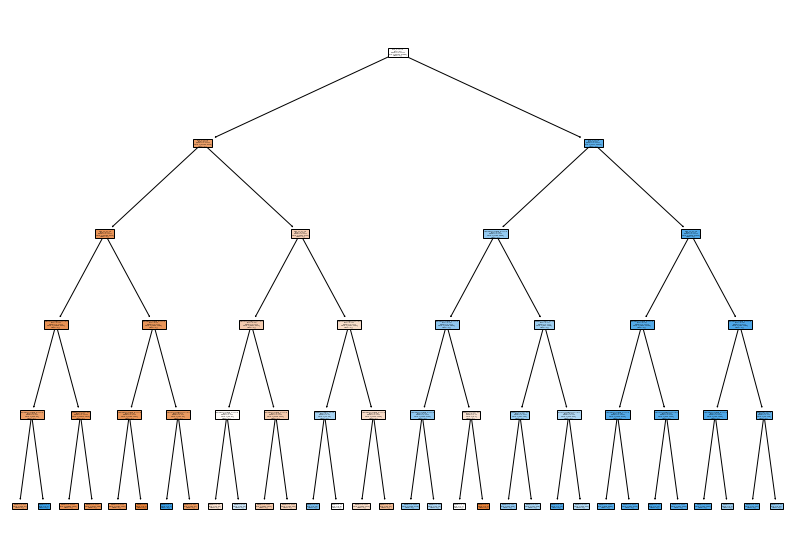

In [39]:
plt.figure(figsize = (14,10))
tree.plot_tree(treeclf, feature_names = X.columns, class_names = True, filled=True)

### Model Predictions

In [40]:
y_pred = treeclf.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

### Model Evaluation Metrics

#### Accuracy Score

In [41]:
accuracy_score(y_test, y_pred)

0.8257738333393955

#### Confusion Matrix

In [42]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [43]:
print("Got them right")
print("true negatives:", tn)
print("true positives", tp)
print("----------------------------")
print("Missclassified")
print("false positives", fp)
print("false negtives", fn)

Got them right
true negatives: 11681
true positives 11022
----------------------------
Missclassified
false positives 1976
false negtives 2814


#### ROC AUC Curve

In [44]:
print(roc_auc_score(y_test, treeclf.predict_proba(X_test)[:,1]).round(3))

0.871


In [45]:
from sklearn.metrics import plot_roc_curve

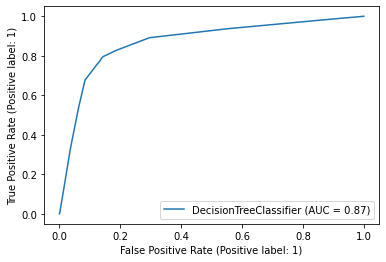

In [46]:
plot = plot_roc_curve(treeclf, X_test, y_test);
plt.show()

In [47]:
from sklearn.metrics import roc_curve

The ROC Curve is staying fairly stagnant but the number of misclassifications are much lower.

## Random Forest Model

In [48]:
balanced_df.columns

Index(['Unnamed: 0', 'WES_HOSPID', 'FINAL_STATE', 'FINAL_BEDSIZE',
       'FINAL_OWNERSHIP', 'FINAL_TEACHING', 'FINAL_REGION', 'AGE', 'Q01_06',
       'Q02_06', 'Q03_06', 'Q04_06', 'Q05_06', 'Q06_06', 'Q07_06', 'Q08_06',
       'Q09_06', 'Q10_06', 'Q11_06', 'Q12_06', 'Q13_06', 'Q14_06', 'Q15_06',
       'Q16_06', 'Q17_06', 'Q18_06', 'Q19_06', 'Q20_06', 'Q21_06', 'Q22_06',
       'Q23_06', 'Q24_06', 'Q25_06', 'Q26A_06', 'Q26B_06', 'Q26C_06',
       'Q26D_06', 'Q26E_06', 'Q27_06', 'RECORDID', 'RACE', 'FINAL_MODE', 'SEX',
       'CRITICAL_HOSPITAL', 'ADMISSIONSOURCE', 'PRINCIPALREASONADMISSION',
       'PATIENTDISCHARGEDATE', 'SURVLANG', 'Season', 'Year', 'Q01_1', 'Q02_1',
       'Q03_1', 'Q05_1', 'Q06_1', 'Q07_1', 'Q08_1', 'Q09_1', 'AGE_1.0',
       'AGE_2.0', 'AGE_3.0', 'AGE_4.0', 'AGE_5.0', 'AGE_6.0', 'AGE_7.0',
       'AGE_8.0', 'AGE_9.0', 'AGE_10.0', 'AGE_11.0', 'AGE_12.0', 'AGE_13.0',
       'AGE_14.0', 'RACE_1.0', 'RACE_2.0', 'RACE_3.0', 'RACE_4.0', 'SEX_1.0',
       'CRITICAL_HOSP

In [49]:
features = ['Q02_1', 'Q03_1','Q08_1', 'Q09_1', 'AGE_1.0',
       'AGE_2.0', 'AGE_3.0', 'AGE_4.0', 'AGE_5.0', 'AGE_6.0', 'AGE_7.0',
       'AGE_8.0', 'AGE_9.0', 'AGE_10.0', 'AGE_11.0', 'AGE_12.0', 'AGE_13.0',
       'AGE_14.0', 'RACE_1.0', 'RACE_2.0', 'RACE_3.0', 'RACE_4.0', 'SEX_1.0',
       'CRITICAL_HOSPITAL_N', 'ADMISSIONSOURCE_1', 'ADMISSIONSOURCE_2',
       'ADMISSIONSOURCE_3', 'ADMISSIONSOURCE_4', 'ADMISSIONSOURCE_5',
       'ADMISSIONSOURCE_6', 'ADMISSIONSOURCE_7', 'ADMISSIONSOURCE_8',
       'ADMISSIONSOURCE_9', 'PRINCIPALREASONADMISSION_1.0',
       'PRINCIPALREASONADMISSION_2.0', 'FINAL_MODE_1', 'SURVLANG_1',
       'SURVLANG_3', 'FINAL_STATE_Midwest_Region',
       'FINAL_STATE_Northeast_Region', 'FINAL_STATE_South_Region',
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Year_2005']
X = balanced_df[features]
y = balanced_df['Q01_1']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 1)

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(n_estimators = 4, random_state=1, max_depth = 5, max_features = None, 
                            min_samples_leaf = 75)

In [53]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=None, min_samples_leaf=75,
                       n_estimators=4, random_state=1)

### Model Predictions

In [54]:
y_pred = rf.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

### Model Evaluation Metrics

#### Accuracy Score

In [55]:
accuracy_score(y_test, y_pred)

0.82621030807842

#### Confusion Matrix

In [56]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [57]:
print("Got them right")
print("true negatives:", tn)
print("true positives", tp)
print("----------------------------")
print("Missclassified")
print("false positives", fp)
print("false negtives", fn)

Got them right
true negatives: 11704
true positives 11011
----------------------------
Missclassified
false positives 1953
false negtives 2825


#### ROC AUC Curve

In [58]:
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]).round(3))

0.888


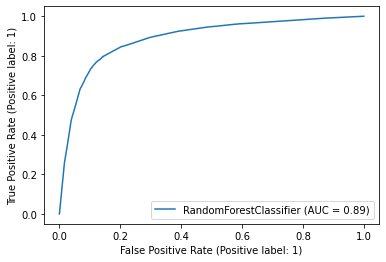

In [59]:
plot = plot_roc_curve(rf, X_test, y_test);
plt.show()

Creating the random forest model showed some improvement, as far as with the ROC AUC. Since, all features were used in this model, I will run a process to choose the best feature variables to see if this helps with the performance.

#### Features of Importance
This method will score the features. The features with the highest scores will help determine features that are the most or least important in the model.

In [60]:
feature_imp = pd.Series(rf.feature_importances_,index = X.columns).sort_values(ascending=False)
feature_imp

Q02_1                           0.889901
Q03_1                           0.079621
Q08_1                           0.019286
Q09_1                           0.001565
AGE_1.0                         0.001298
RACE_1.0                        0.001120
PRINCIPALREASONADMISSION_1.0    0.001010
AGE_3.0                         0.000823
SEX_1.0                         0.000725
SURVLANG_1                      0.000674
AGE_10.0                        0.000539
AGE_9.0                         0.000455
FINAL_MODE_1                    0.000413
AGE_2.0                         0.000396
AGE_13.0                        0.000374
RACE_3.0                        0.000301
Season_Summer                   0.000283
ADMISSIONSOURCE_9               0.000237
AGE_11.0                        0.000173
AGE_14.0                        0.000140
FINAL_STATE_Northeast_Region    0.000139
AGE_5.0                         0.000106
Season_Spring                   0.000105
FINAL_STATE_South_Region        0.000101
AGE_12.0        

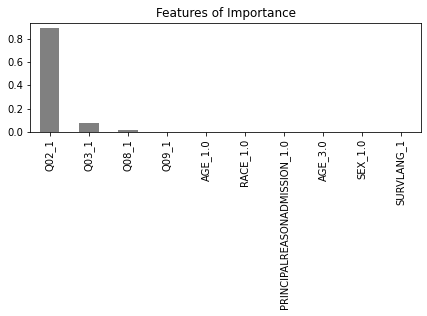

In [61]:
plt.figure(figsize=(7,2))
feature_imp.nlargest(10).plot(kind = 'bar', color='gray');
plt.title('Features of Importance');

Q02_1 had the highest score, indicating the best feature for the model. However, I would expect this. Typically a person who has courtesy and respect, may also have characteristics of good listening skills and explaining things well. I also checked the correlation of these questions and the outcome was minimum.

## Random Forest - using features of importance

### Train, Test, Split

In [62]:
features = ['Q02_1', 'Q03_1','Q08_1']
X = balanced_df[features]
y = balanced_df['Q01_1']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 1)

In [64]:
rf = RandomForestClassifier(n_estimators = 4, random_state=1, max_depth = 6, max_features = None, min_samples_leaf = 50)

In [65]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_features=None, min_samples_leaf=50,
                       n_estimators=4, random_state=1)

### Model Predictions

In [66]:
y_pred = rf.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

### Model Evaluation Metrics

#### Accuracy Score

In [67]:
accuracy_score(y_test, y_pred)

0.8262830538682574

#### Confusion Matrix

In [68]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [69]:
print("Got them right")
print("true negatives:", tn)
print("true positives", tp)
print("----------------------------")
print("Missclassified")
print("false positives", fp)
print("false negtives", fn)

Got them right
true negatives: 11699
true positives 11018
----------------------------
Missclassified
false positives 1958
false negtives 2818


#### ROC AUC Curve

In [70]:
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]).round(3))

0.882


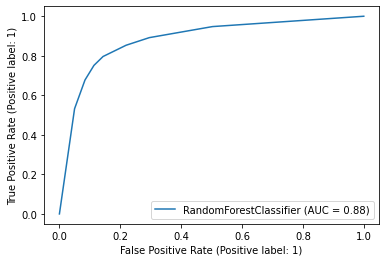

In [71]:
plot = plot_roc_curve(rf, X_test, y_test);
plt.show()

## Decision Tree - using Features of Importance

In [72]:
treeclf = DecisionTreeClassifier(max_depth = 5, random_state = 1)

In [73]:
treeclf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

[Text(390.6, 475.65000000000003, 'Q02_1 <= 0.5\ngini = 0.5\nsamples = 64149\nvalue = [32164, 31985]\nclass = y[0]'),
 Text(195.3, 339.75, 'Q03_1 <= 0.5\ngini = 0.306\nsamples = 34198\nvalue = [27753, 6445]\nclass = y[0]'),
 Text(97.65, 203.85000000000002, 'Q08_1 <= 0.5\ngini = 0.222\nsamples = 26102\nvalue = [22789, 3313]\nclass = y[0]'),
 Text(48.825, 67.94999999999999, 'gini = 0.167\nsamples = 17809\nvalue = [16167, 1642]\nclass = y[0]'),
 Text(146.47500000000002, 67.94999999999999, 'gini = 0.322\nsamples = 8293\nvalue = [6622, 1671]\nclass = y[0]'),
 Text(292.95000000000005, 203.85000000000002, 'Q08_1 <= 0.5\ngini = 0.474\nsamples = 8096\nvalue = [4964, 3132]\nclass = y[0]'),
 Text(244.125, 67.94999999999999, 'gini = 0.439\nsamples = 3637\nvalue = [2453, 1184]\nclass = y[0]'),
 Text(341.77500000000003, 67.94999999999999, 'gini = 0.492\nsamples = 4459\nvalue = [2511, 1948]\nclass = y[0]'),
 Text(585.9000000000001, 339.75, 'Q03_1 <= 0.5\ngini = 0.251\nsamples = 29951\nvalue = [4411, 2

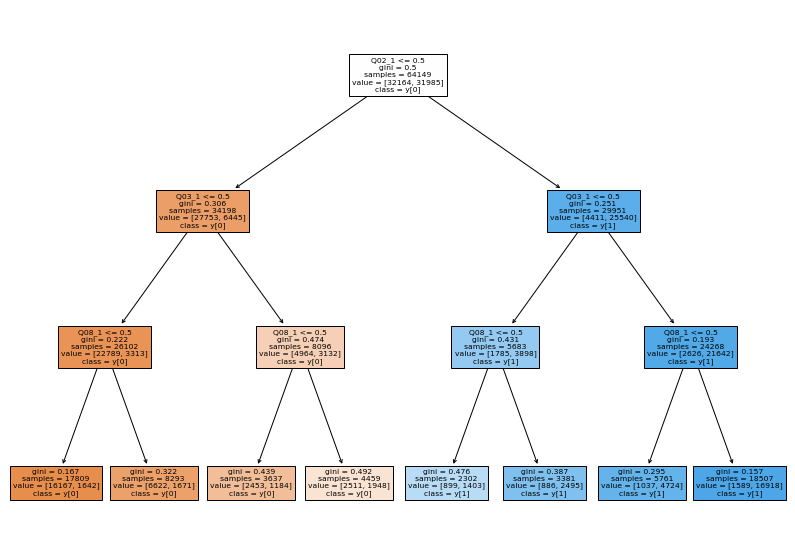

In [74]:
plt.figure(figsize = (14,10))
tree.plot_tree(treeclf, feature_names = X.columns, class_names = True, filled=True)

### Model Predictions

In [75]:
y_pred = treeclf.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

### Model Evaluation Metrics

#### Accuracy Score

In [76]:
accuracy_score(y_test, y_pred)

0.8262830538682574

#### Confusion Matrix

In [77]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [78]:
print("Got them right")
print("true negatives:", tn)
print("true positives", tp)
print("----------------------------")
print("Missclassified")
print("false positives", fp)
print("false negtives", fn)

Got them right
true negatives: 11699
true positives 11018
----------------------------
Missclassified
false positives 1958
false negtives 2818


#### ROC AUC Curve

In [79]:
print(roc_auc_score(y_test, treeclf.predict_proba(X_test)[:,1]).round(3))

0.882


In [80]:
from sklearn.metrics import plot_roc_curve

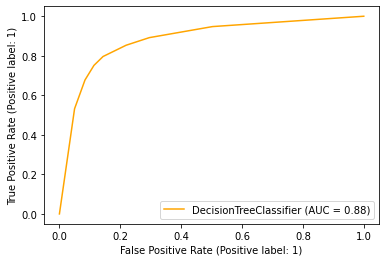

In [81]:
plot = plot_roc_curve(treeclf, X_test, y_test,color='orange');
plt.show()

Based on the accuracy and ROC AUC of each model, the Random Forest and Decision Tree w/ feature variables had the best ROC Score, with a decent error rate of misclassifications. Therefore, the Decision Tree w/ feature variables will be used.

## Recommendations

- In a real world scenario, make sure the data is right and complete to determine if there are issues with the input dataset and features. (However, in this case, the data being used is not a true representation of the real data, which may be why other features don't work well with the model.)
- Add in new features to the dataset, such as complaints from patients and length of waiting times to see if that helps with the models performance.